# Analysing 120 years of Olympics 

This notebook deals with deals with the statistical analysis of Olympics 2016 and hence coming out with valuable results, analysis and predictions about the Olympics to come in the later years. Comparison between different countries and the results from different years give important information of the participation from each country and hence the reasons can be understood.

The influence of different bodily characteristics is also studied such as height, weight and age; also Time series analysis is done to check the future participation. The R tools used have benefitted for the study and hence drawing conclusions

## Introduction
The ancient Olympic game was held at Olympia, Greece, from 776 BC through 393 AD. It returned after 1503 years. The first modern Olympic was held in Athens, Greece in 1896. The ‘modern Olympics’ now comprises all the Games from Athens 1896 to Rio 2016. Baron Pierre de Coubertin presented the idea in 1894. There are two long periods without any Games between 1912-1920 and 1936-1948, corresponding to World War I and World War II.


The data collected for this paper is from <a href='https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results'>Olympics Kaggle.com </a>, it is about the olypics that has taken place for the 120 years, that is ranging form 1896 to 2016. The latest olympics was on 2018, but due to lack of information about the Olympics 2018, the year was omitted fomr the dataset.

The dataset consistes of different charactiers of an olympian namely name, dender, age, height, weight,   team, medals wons, sport, year of participation etc, from 1896 to 2016. 

From 1992, it became a rule that winter and summer olympics happens only once in 4 years, but the gap betwenn a winter and a summer game is 2 years, that is every two years, winter and summer Olympics happens alternatively. Till 1992, both winter and summer olympics happen in the same year every two years.

This paper aims in statistically finding soluitons to the common questions we have about olympics in the past and also doing predictive analysis for the future.

The major comparison is between in winter and summer games. The tests can show whether summer or winter have more participants and coming up with logical explanation of why that happens. 


The dataset of 271117 records are taken that involves information about the Participants from the year 1896 to 2016. The data is cleaned to remove the null values

### Loading the dataset and omitting the null values


In [1]:
library(readr)
athlete_events <- read_csv("D:/Irene/123 folder/R/athlete_events.csv")
athlete_events <- na.omit(athlete_events)

Parsed with column specification:
cols(
  ID = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  Height = col_double(),
  Weight = col_double(),
  Team = col_character(),
  NOC = col_character(),
  Games = col_character(),
  Year = col_double(),
  Season = col_character(),
  City = col_character(),
  Sport = col_character(),
  Event = col_character(),
  Medal = col_character()
)


After cleaning the data, there are now 30181 records. The analysis is done in this dataset.

### To check the difference in the participation between each seasons


In [2]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



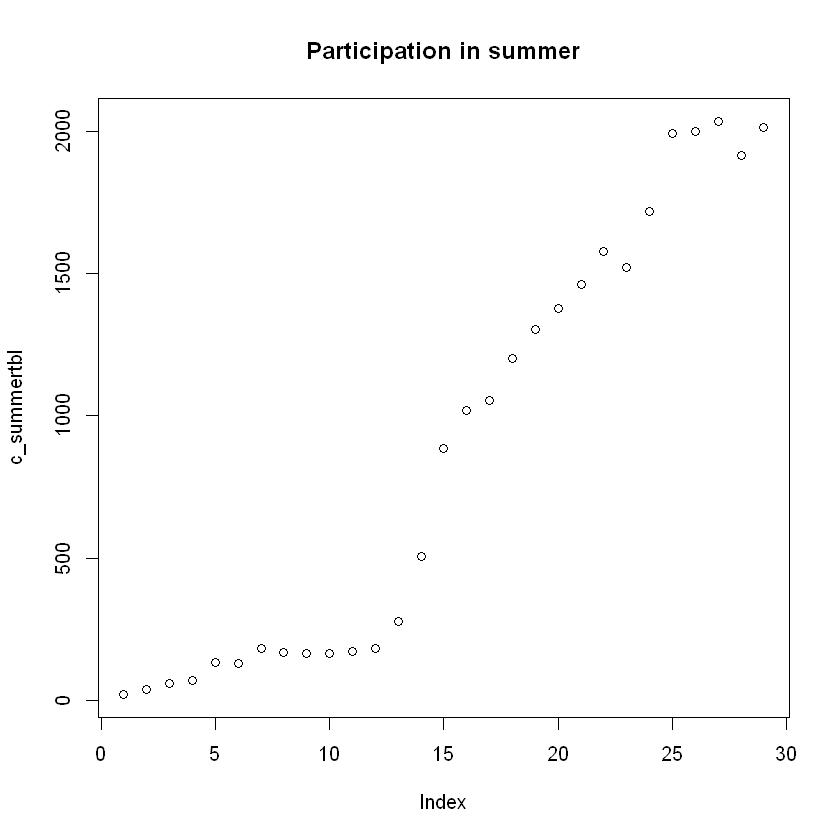

In [3]:
summer=filter(athlete_events,Season=="Summer")
summertbl=table(summer$Year,summer$Medal)
c_summertbl=cbind(summertbl[,1]+summertbl[,2]+summertbl[,3])
winter=filter(athlete_events,Season=="Winter")
wintertbl=table(winter$Year,winter$Medal)
c_wintertbl=cbind(wintertbl[,1]+wintertbl[,2]+wintertbl[,3])
plot(c_summertbl,main="Participation in summer")


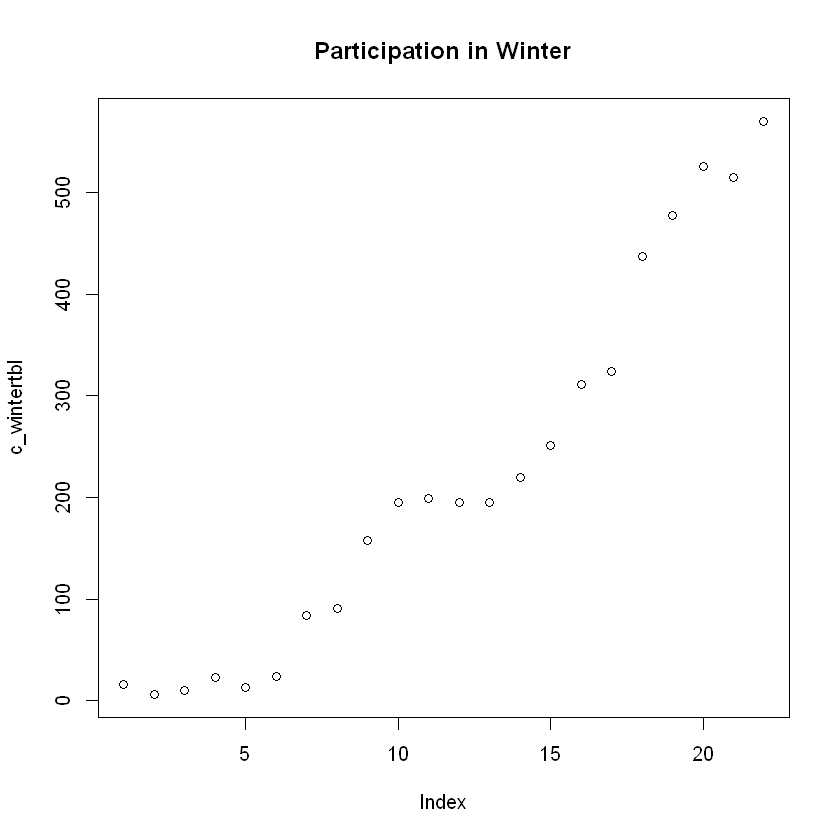

In [4]:
plot(c_wintertbl,main="Participation in Winter")

From Figure 1 and 2 it is evident that there is significant difference between the participation in each season. 
The winners’ count in summer goes to 2000 whereas the maximum winners in winter are around 500 which explain about the participation and the number of events they could possibly have.

Number of participants in each season can be computed using:


In [5]:
summer=filter(athlete_events,Season=="Summer")
count(summer)


n
<int>
25341


In [6]:
Winter=filter(athlete_events,Season=="Winter")
count(Winter)


n
<int>
4840


### List of Sport in each season:


In [7]:
table(summer$Sport,summer$Season)


                       
                        Summer
  Archery                  206
  Art Competitions           2
  Athletics               3648
  Badminton                154
  Baseball                 333
  Basketball              1000
  Beach Volleyball          68
  Boxing                   708
  Canoeing                1041
  Cycling                  845
  Diving                   318
  Equestrianism            663
  Fencing                 1109
  Figure Skating             2
  Football                1084
  Golf                       4
  Gymnastics              1161
  Handball                 937
  Hockey                  1168
  Ice Hockey                18
  Judo                     526
  Lacrosse                   2
  Modern Pentathlon        153
  Rhythmic Gymnastics      124
  Rowing                  2104
  Rugby                     30
  Rugby Sevens              74
  Sailing                  677
  Shooting                 542
  Softball                 172
  Swimming     

In [8]:
table(Winter$Sport,Winter$Season)

                           
                            Winter
  Alpine Skiing                354
  Biathlon                     388
  Bobsleigh                    283
  Cross Country Skiing         687
  Curling                      131
  Figure Skating               247
  Freestyle Skiing             102
  Ice Hockey                  1283
  Luge                         178
  Nordic Combined              137
  Short Track Speed Skating    274
  Skeleton                      24
  Ski Jumping                  175
  Snowboarding                  89
  Speed Skating                488

From this we can see that the number of sport is less in winter when compared to summer, correspondingly the participation is also less

### Finding whether the variances of both the participation from each Season are equal or not, using F test

Using F test we can say whether the data can be used for T testing, even though the size is 35 which is greater than 30, we still use the F and T test for comparison as it is still not a very big number


Hence we first conduct the F test 

Ho: The variances are equal to each other 

H1: there is significant difference between the variances among the samples (seasons)


In [9]:
summer=filter(athlete_events,Season=="Summer")
winter=filter(athlete_events,Season=="Winter")
c_summertbl=table(summer$Year,summer$Season)
c_wintertbl=table(winter$Year,winter$Season)
summerdata=c_summertbl[,1]
winterdata=c_wintertbl[,1]
var.test(summerdata,winterdata)



	F test to compare two variances

data:  summerdata and winterdata
F = 16.567, num df = 28, denom df = 21, p-value = 9.737e-09
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  7.124355 36.709304
sample estimates:
ratio of variances 
          16.56689 


Interpretation:

It is evident that the p value is very small hence we reject Null hypothesis. Hence we can say that the Variances are unequal. There is no need to conduct the t test.

### Assuming the variances are true, we conduct t test
We conduct t test to check whether there is any significant differences between the mean of the two season participation to check the equivalence of averages.

Hence the null hypothesis becomes,

Ho: the means of the samples are equal.

H1: the means of the samples are unequal.



In [10]:
t.test(summerdata,winterdata,var.equal = TRUE)


	Two Sample t-test

data:  summerdata and winterdata
t = 3.945, df = 49, p-value = 0.0002542
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 320.7691 986.8861
sample estimates:
mean of x mean of y 
 873.8276  220.0000 


Interpretation:

It is evident that the p value is very small hence we reject Null hypothesis. Hence we can say that the Means are unequal.

### To check in the association in the prices won with gender

To check the association among the variables we conduct the Chi-square test.

Null hypothesis, 
Ho: there is no association among the Variables (The variables don’t affect each other) 

Alternative hypothesis, 
H1: there is association among the Variables (The variables have some effect on each other)


In [11]:
athlete_eventstbl=table (athlete_events$Sex,athlete_events$Medal)
athlete_eventstbl

   
    Bronze Gold Silver
  F   3475 3437   3438
  M   6673 6730   6428

In [12]:
chisq.test(athlete_eventstbl) 


	Pearson's Chi-squared test

data:  athlete_eventstbl
X-squared = 2.4273, df = 2, p-value = 0.2971


Since the p value is greater than 0.05, null hypothesis accepted. Hence we can say that there is no effect on gender on the medals won, hence there is equal chances for men and women to win an Olympic event given that they participate accordingly.

### How height and weight are related to each other
To check the association among the height and weight of a participant, we conduct the Chi-square test. Null hypothesis, 

Ho: there is no association among height and weight (The variables don’t affect each other) Alternative hypothesis, 

H1: there is association among the height and weight (The variables have some effect on each other)


In [13]:
#how height and weight are related to each other
htint=seq(min(athlete_events$Height),max(athlete_events$Height),by=20)
wtint=seq(min(athlete_events$Weight),max(athlete_events$Weight),by=30)
tbl=table(cut(athlete_events$Height,htint),cut(athlete_events$Weight,wtint))
chisq.test(tbl)# there is association


Warning message in chisq.test(tbl):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  tbl
X-squared = 14348, df = 12, p-value < 2.2e-16


Result:
The p value is smaller than 0.05 hence, the null hypothesis. that is, there is significant diiference in the weight of an individual based on his/ her height

### Plotting the association:


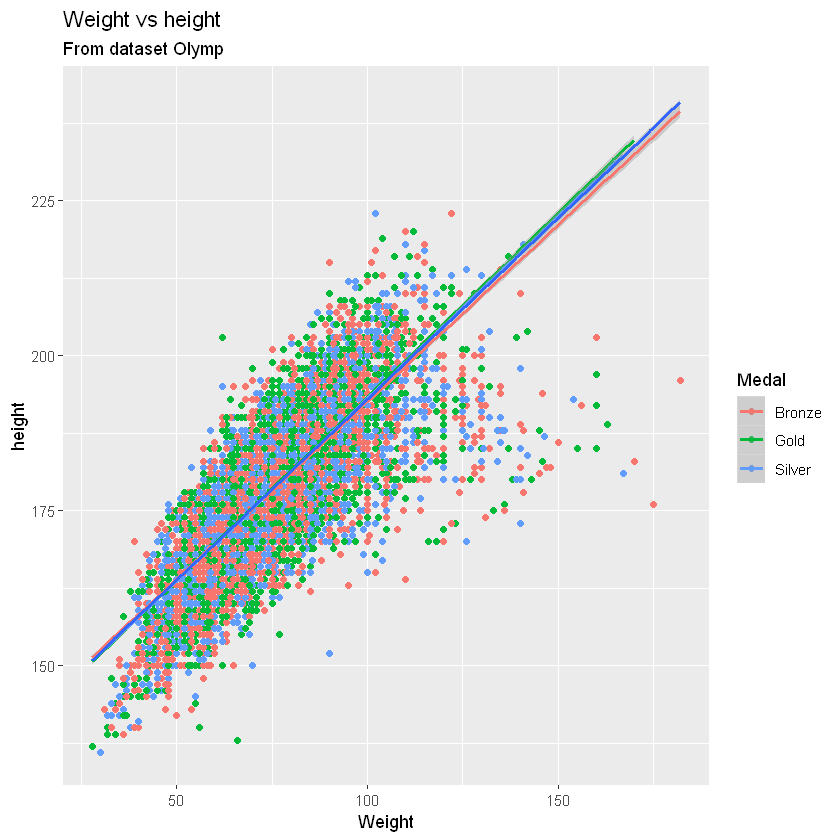

In [14]:
library(ggplot2)
ggplot(athlete_events, aes(x=Weight,y=Height))+
  geom_point(aes(col =Medal))+geom_smooth(method = "lm",(aes(col =Medal)))+
  geom_smooth(method = "lm")+
  labs(title="Weight vs height",
       subtitle = "From dataset Olymp",
       x="Weight",y="height")


Note: The plotting is done even based on the Medals won; there is a relatively greater slope for the gold medal winners, which means that the comparatively less heavy people have won Gold. But that cannot be a true statement as the lines are nearly coinciding.
Hence from figure 3 the data shows a direct proportion between the variables weight and height.

### To analyse whether there is any significant difference between the populatiom body mass index and that of the Olympics participants
Given that the mean BMI of the population is 22 Kg/m^2, and variance is 5.44, we conduct the z test with 95% level is significance. The null hypothesis is given by 

Ho: there is no significant difference between the population body mass index and that of the Olympics participants 

H1: there is significant difference between the population body mass index and that of the Olympics participants


In [15]:
bmi=athlete_events$Weight/(athlete_events$Height/100)^2
var(bmi)


[1] 8.757671

The z test gives a Z value much greater than the tabular z value which is 1.96. So the null hypothesis is accepted

Hence there is no significance difference between the mean population BMI and the participants’ BMI. So the Mean and Variance given from the population is not Gender biased.
### Finding out whether there is any associaiton between age and price winning

To check the association among the age of participants and price winning we conduct the Chi-square test. 
Null hypothesis, 

Ho: there is no association among the age of participants and price winning 
Alternative hypothesis,

H1: there is association among the age of participants and price winning (The variables have some effect on each other)


In [16]:
ageint=seq(13,66,by=10)
tbl=table(cut(athlete_events$Age,ageint),athlete_events$Medal)
tbl


         
          Bronze Gold Silver
  (13,23]   3841 3957   3743
  (23,33]   5691 5606   5526
  (33,43]    543  535    523
  (43,53]     65   58     59
  (53,63]      7    7      9

In [17]:
chisq.test(tbl) # no associaiton


	Pearson's Chi-squared test

data:  tbl
X-squared = 3.7941, df = 8, p-value = 0.8752


Result:

Since the P value is greater than 0.05, the null hypothesis is accepted and we can say that, there is no association among the age or the ability to win an event in Olympics
### Time series Analysis
Converting the dataset into a time series dataset


Warning message:
"package 'tseries' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


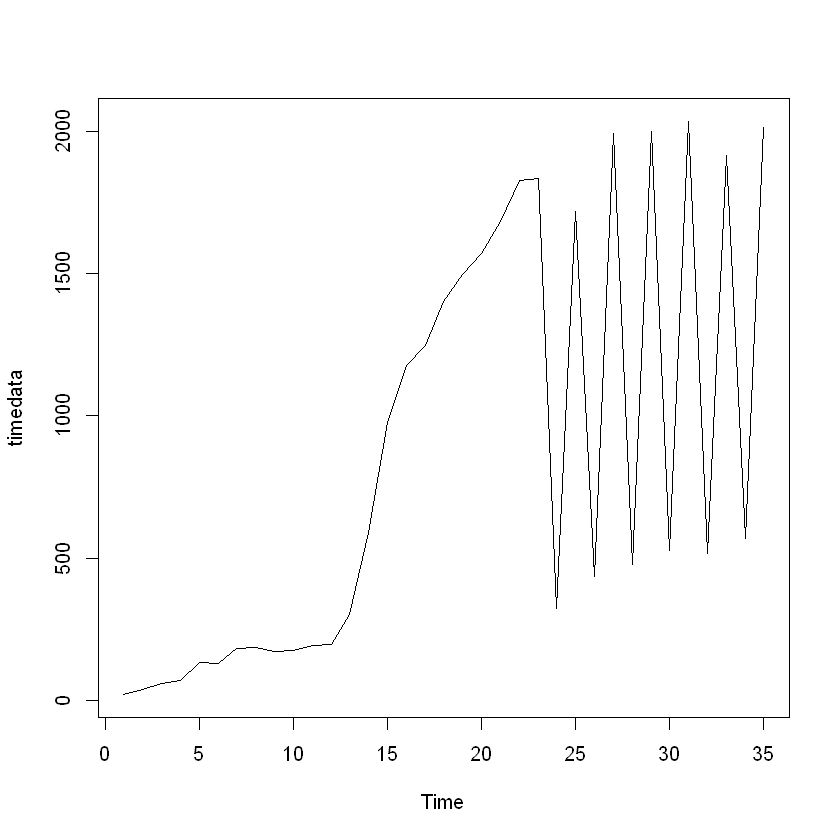

In [18]:
library(tseries)
tdata=table(athlete_events$Year,athlete_events$Season)
timedata=ts(cbind(tdata[,1]+tdata[,2]))
ts.plot(timedata)


Since there are trend components in the time series data set (Figure 4), we have to differentiate the time series and test the stationarity using Augmented Dickey fuller test and if the p value is greater than 0.05, it mean that the dataset needs to be differentiated over again.


In [19]:
library(tseries)
adf.test(timedata)



	Augmented Dickey-Fuller Test

data:  timedata
Dickey-Fuller = -1.5282, Lag order = 3, p-value = 0.7563
alternative hypothesis: stationary


In [20]:
d1=diff(timedata)

adf.test(d1) # our result is still not stationary



	Augmented Dickey-Fuller Test

data:  d1
Dickey-Fuller = -2.8967, Lag order = 3, p-value = 0.2256
alternative hypothesis: stationary


Warning message in adf.test(d2):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  d2
Dickey-Fuller = -4.7409, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


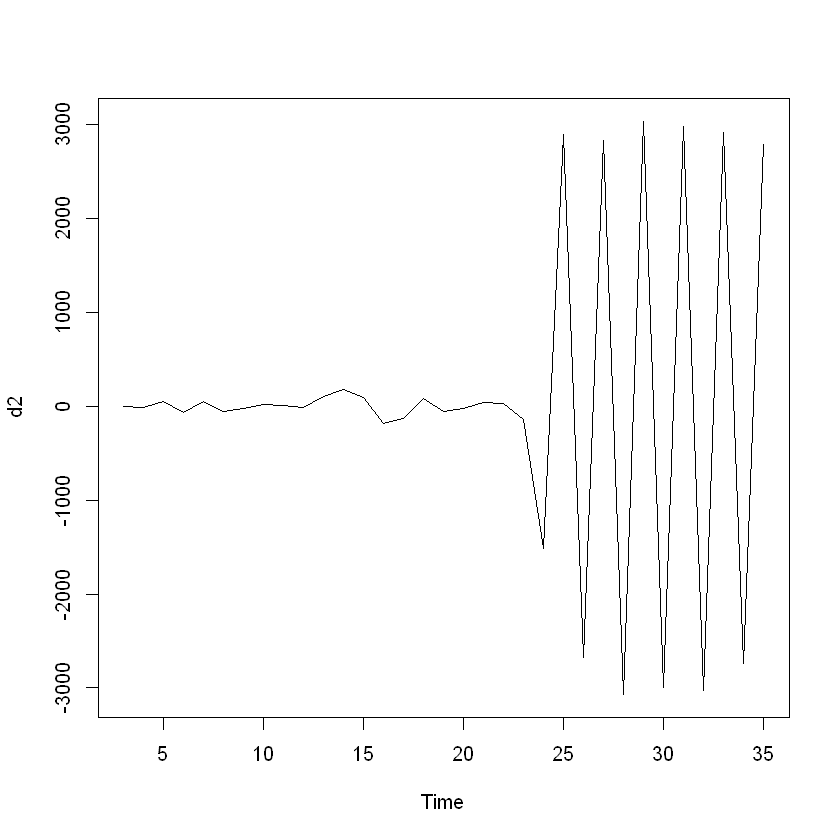

In [21]:
d2=diff(d1)
ts.plot(d2)

adf.test(d2) # hence our result is stationary


The non- stationary component has highly affected the data, hence there was need to differentiate them twice before reaching a stationary dataset.

The plot now shows the stationary time series plot of the actual data
### Forecasting


Warning message:
"package 'forecast' was built under R version 3.6.3"

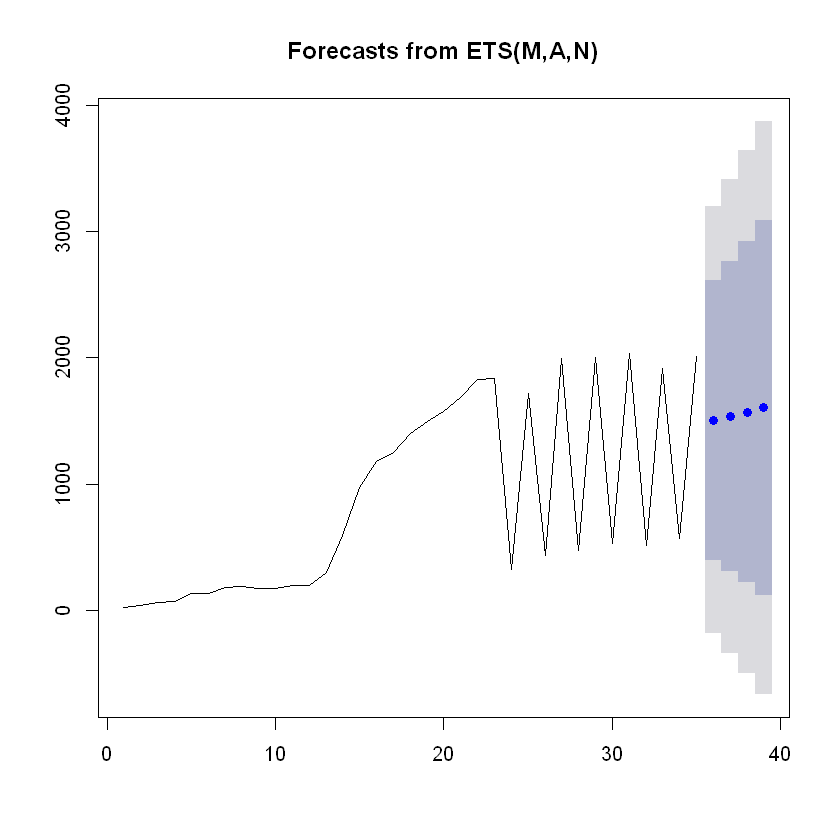

In [22]:
library(forecast)
fore_athlete <- forecast(timedata, h=4)
plot(fore_athlete)


Hence, from figure 6, we can see that the future participation is a constant increase but the slope (participation) is very minutely to increase in the fore coming years.
### Holt winters Filtering
The Holt-Winters algorithm is used for forecasting and it is a time-series forecasting method. Time series forecasting methods are used to extract and analyze data and statistics and characterize results to more accurately predict the future based on historical data.


In [23]:
filt <- HoltWinters(timedata, gamma=FALSE) 
filt


Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = timedata, gamma = FALSE)

Smoothing parameters:
 alpha: 0.2385244
 beta : 0
 gamma: FALSE

Coefficients:
      [,1]
a 1417.041
b   18.000

In [24]:
filt$SSE

[1] 11417204

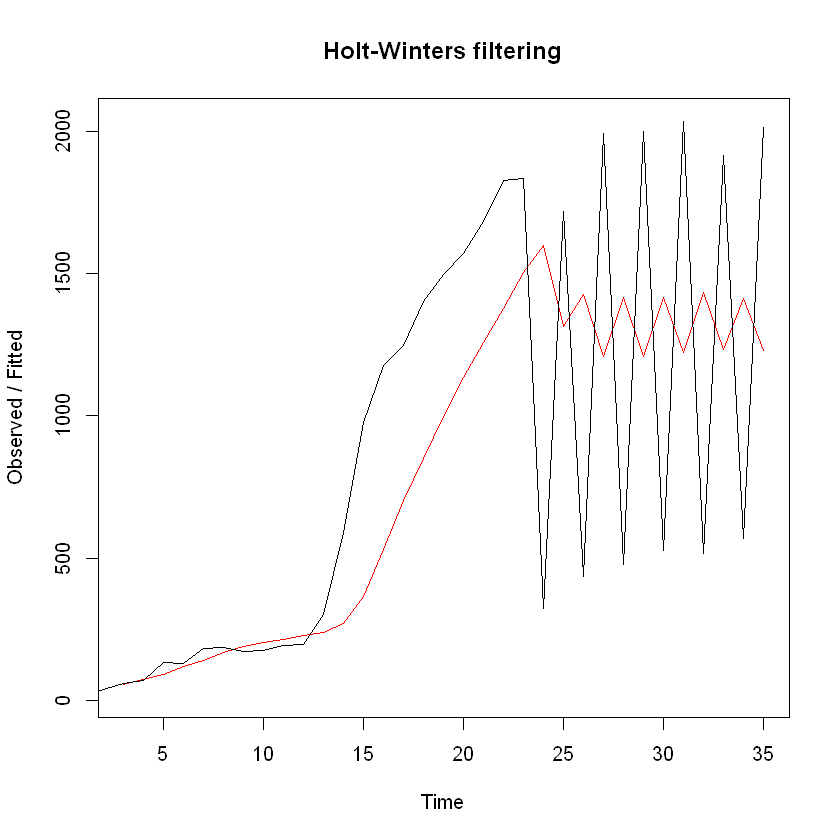

In [25]:
plot(filt)


Hence, from Figure 7, it is evident that a smoothed time series data is obtained. This can help is further approaches to predict the future values and hence the organizers can be ready and prepared for providing resources for the whole set of Olympians to come and witness the grand competition.

## CONCLUSION:

The Olympics help for the last 120 years have gone through many changes. Winter and Summer Olympics happen only one in two year alternatively from 1992 which wasn’t so before from 1896. Even the number of games and the type of games evolved gradually within these 120 years. We can never be sure about how many other games would emerge the next years even through predictive analysis. The origin of new games is also based on the popularity of the game and the passion of player as well as the association agreeing to add the new game into the list of events.

The number of participants will increase in a very gradual level in the fore coming years (from Figure 6). This forecasting will help in the organizers to be prepared to provide resources for the participants and preparing the charts even before the participant list is completely set. 

There are many games in Olympics that are separated based on gender, but games such as Archery is not differentiated on gender. For the events held, there is no significant association among the gender or the medals won. The participation of female has greatly emerged from 1980. The female participation has peaked in 2016 and is expected to keep increasing even for the next decades. The male participation has been rather irregular, there have been times when the participation of male decreased one year and increased the next. There was a vast difference among the male and female participation which is now neared from the last decade.

There is also no association among the age of a participant and the medals they achieve, so the general perception that younger a person is , more the chance of winning , is false and needs to be rectified.

The participants of Olympics have managed to keep up with the normal Body mass index, and have shown that they are not very different from others in terms of bodily characteristics but it is all based on their hard work, skills and training.

These analysis has helped in testing statistically whether the participants have any induced medication in their body that have enhanced their performance that is unethical and a punishable offence.

The winter and summer games have a lot of difference between them. The participation is immense in Summer Games when compared to the participation in Winter Games, Summer games have Four time more participants than in winter games. Even the list of events is greater in  the Summer Games. 

USA has won most of the medals in past years and Russia has the 2nd most medals won followed by Germany and so on. As per the growth of US Olympic team, there we can do necessary conclusion that US would stay in the lead of the most Medals won even in the next few years.
